# Malaria cell image



In [27]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# use following command to install cv2 package
#pip install opencv-python
import cv2

### Displaying Uninfected and Infected Cell tissues


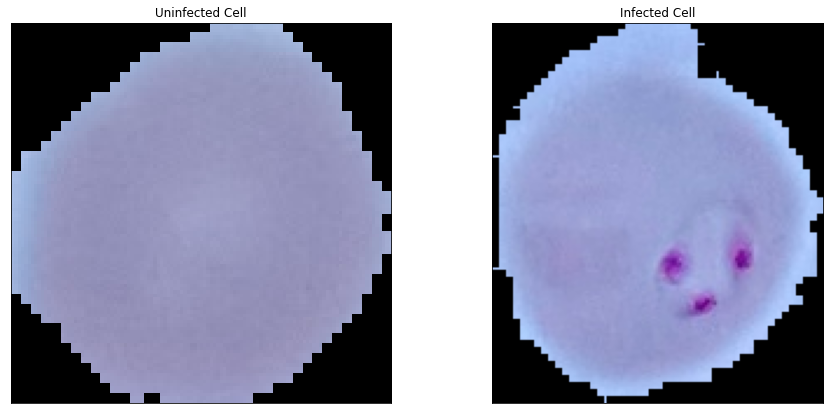

In [28]:
upic='cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png'
apic='cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

### Dividing Dataset into two folders train and test

In [29]:
width = 128
height = 128
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [30]:
trainDatagen = datagen.flow_from_directory(directory='cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [31]:
valDatagen = datagen.flow_from_directory(directory='cell_images/',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [43]:
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(tf.keras.layers.MaxPooling2D((3,3)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))


In [44]:
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 42, 42, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 40, 40, 32)        18464     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                409632    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [46]:
# model fit
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [47]:
# report accuracy from training/test data
history=model.fit(trainDatagen, epochs = 5,
                 validation_data=valDatagen)

Epoch 1/5
1378/1378 [==============================] - 143s 103ms/step - loss: 0.5197 - accuracy: 0.7083 - val_loss: 0.2026 - val_accuracy: 0.9325
Epoch 2/5
1378/1378 [==============================] - 145s 105ms/step - loss: 0.1852 - accuracy: 0.9366 - val_loss: 0.2266 - val_accuracy: 0.9290
Epoch 3/5
1378/1378 [==============================] - 156s 113ms/step - loss: 0.1553 - accuracy: 0.9500 - val_loss: 0.2165 - val_accuracy: 0.9336
Epoch 4/5
1378/1378 [==============================] - 169s 123ms/step - loss: 0.1212 - accuracy: 0.9597 - val_loss: 0.2001 - val_accuracy: 0.9327
Epoch 5/5
1378/1378 [==============================] - 170s 123ms/step - loss: 0.1010 - accuracy: 0.9672 - val_loss: 0.3388 - val_accuracy: 0.9265


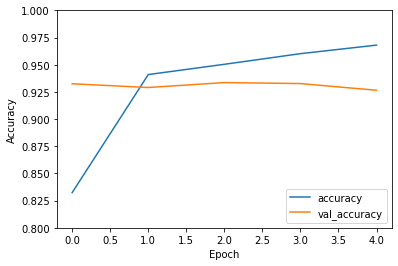

In [50]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.legend(loc='lower right')

#test_Acc=model.evaluate(valDatagen, verbose=2)